this node covers fully realization of understanding linguistic features of fake news with ML+ feature engineering.

In [2]:
# import python dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotting_util
import util
import preprocessing
import importlib
import nlp_util
nlp_task = nlp_util.NLP_Task()

NLP_Task ready to use.
NLP_Task ready to use.


In [3]:
# load dataset & preprocess dataset
tr_file, va_file, te_file = util.load_files()
tr_dict = util.tsv_to_dict(tsv_file=tr_file)
va_dict = util.tsv_to_dict(tsv_file=va_file)
te_dict = util.tsv_to_dict(tsv_file=te_file)

## preprocessing
tr_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=tr_file)
va_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=va_file)
te_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=te_file)

## rename dataset
features_training = pd.DataFrame()
features_validation = pd.DataFrame()
features_testing = pd.DataFrame()
features_training['text'] = tr_file['preprocessed']
features_validation['text'] = va_file['preprocessed']
features_testing['text'] = te_file['preprocessed']

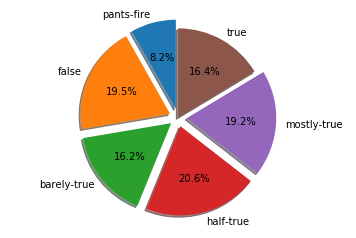

In [4]:
### EDA on LIAR dataset
importlib.reload(plotting_util)

data_by_label = [ len(tr_file['Label'].values[tr_file['Label'] == 'pants-fire']),
    len(tr_file['Label'].values[tr_file['Label'] == 'false']),
                 len(tr_file['Label'].values[tr_file['Label'] == 'barely-true']),
                 len(tr_file['Label'].values[tr_file['Label'] == 'half-true']),
                 len(tr_file['Label'].values[tr_file['Label'] == 'mostly-true']),
                len(tr_file['Label'].values[tr_file['Label'] == 'true'])
                ]
data_labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true','true']

sizes = data_by_label
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=data_labels, autopct='%1.1f%%', explode= explode,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

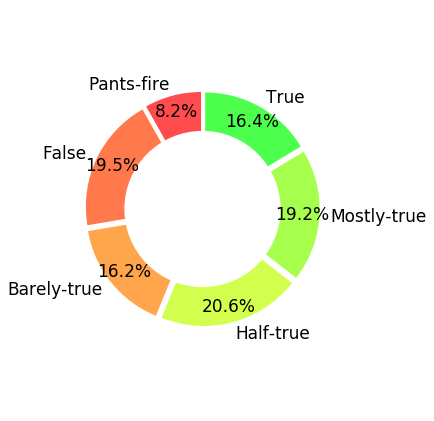

In [5]:
# Pie chart
labels = ['Pants-fire', 'False', 'Barely-true', 'Half-true', 'Mostly-true','True']
sizes = data_by_label
#colors
colors = ['#ff4d4d','#ff794d','#ffa64d','#d2ff4d','#a6ff4d','#4dff4d']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)


fig1, ax1 = plt.subplots(figsize=(6,6)) 
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode, textprops={'fontsize': 17})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

plt.tight_layout()
plt.show()

### Feature engineering

In this section, I used stanfordcorenlp to do pos tagging on fake news dataset

#### Extracting POS tags grouped by unigrams, bigrams and trigrams

In [7]:
# POS extracted from no preprocessed data for training, validation and testing files
unigram_pos, bigrams_pos, trigram_pos = preprocessing.extract_POS(statements=tr_dict['statement'])
unigram_pos_va, bigrams_pos_va, trigram_pos_va = preprocessing.extract_POS(statements=va_dict['statement'])
unigram_pos_te, bigrams_pos_te, trigram_pos_te = preprocessing.extract_POS(statements=te_dict['statement'])

Extracting POS Tags
Finished
Extracting POS Tags
Finished
Extracting POS Tags
Finished


In [8]:
# Pos extracted from preprocessed data for training, validation and testing files
unigram_pos_p, bigrams_pos_p, trigram_pos_p = preprocessing.extract_POS(tr_file['preprocessed'].values)
unigram_pos_p_va, bigrams_pos_p_va, trigram_pos_p_va = preprocessing.extract_POS(va_file['preprocessed'].values)
unigram_pos_p_te, bigrams_pos_p_te, trigram_pos_p_te = preprocessing.extract_POS(te_file['preprocessed'].values)

Extracting POS Tags
Finished
Extracting POS Tags
Finished
Extracting POS Tags
Finished


In [9]:
list_to_remove = ['NNP','CD']
# Training
removed_pos = nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p)
removed_pos_va =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_va)
removed_pos_te =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_te)

removed_pos_bigrams = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos)
removed_pos_bigrams_va = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_va)
removed_pos_bigrams_te = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_te)

removed_pos_trigrams = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos)
removed_pos_trigrams_va = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_va)
removed_pos_trigrams_te = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_te)

In [10]:
list_to_remove = ['NNP','CD']
features_training['pos'] = [" ".join(x).replace('<s>','').replace('$','dollar').strip() for x in removed_pos]
features_validation['pos'] = [" ".join(x).replace('<s>','').replace('$','dollar').strip() for x in removed_pos_va]
features_testing['pos'] = [" ".join(x).replace('<s>','').replace('$','dollar').strip() for x in removed_pos_te]

In [11]:
list_to_remove = ['NNP','CD']
features_training['pos_bi'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_bigrams]
features_validation['pos_bi'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_bigrams_va]
features_testing['pos_bi'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_bigrams_te]

In [12]:
list_to_remove = ['NNP','CD']
features_training['pos_tri'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_trigrams]
features_validation['pos_tri'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_trigrams_va]
features_testing['pos_tri'] = [" ".join(x).replace('$','dollar').strip() for x in removed_pos_trigrams_te]

### Get unique values for unigrams, bigrams and trigrams

In [13]:
# Unique list of unigrams, bigrams and trigrams for no preprocessed data
unigram_list_tr = nlp_task.UniquePosTags(unigram_pos)
bigram_list_tr = nlp_task.UniquePosTags(bigrams_pos)
trigram_list_tr = nlp_task.UniquePosTags(trigram_pos)

In [14]:
# Unique list of unigrams, bigrams and trigrams for preprocessed data
unigram_list_tr_processed = nlp_task.UniquePosTags(unigram_pos_p)
bigram_list_tr_processed = nlp_task.UniquePosTags(bigrams_pos_p)
trigram_list_tr_processed = nlp_task.UniquePosTags(trigram_pos_p)

### Removing duplicated POS in bigrams and trigrams [NNP and CD]

For example: The/DT economy/NN bled/VBD $/$ 24/CD billion/CD due/JJ to/TO the/DT government/NN shutdown/NN ./. <br>
In this case having CD_CD is the same as having only CD<br>
Same with: <br>
U.S./NNP Rep./NNP Ron/NNP Kind/NNP ,/, D-Wis./NNP ,/, and/CC his/PRP$ fellow/JJ Democrats/NNS went/VBD on/IN a/DT spending/NN spree/NN and/CC now/RB their/PRP$ credit/NN card/NN is/VBZ maxed/VBN out/RP <br>
We don't need all those NNPs to find a pattern and it might be noisy to the ML algorithm<br>

In [15]:
# For raw data

list_to_remove = ['NNP','CD']
# Training
removed_pos = nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos)
removed_pos_bigrams = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos)
removed_pos_trigrams = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos)

# Validdation
removed_pos_va =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_va)
removed_pos_bigrams_va = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_va)
removed_pos_trigrams_va = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_va)

# Testing
removed_pos_te =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_te)
removed_pos_bigrams_te = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_te)
removed_pos_trigrams_te = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_te)

#LIST OF UNIQUE BIGRAMS AND TRIGRAMS AFTER REMOVING CONSECUTIVE SAME TAGS
removed_unique_bigrams = nlp_task.UniquePosTags(postags=removed_pos_bigrams)
removed_unique_trigrams = nlp_task.UniquePosTags(postags=removed_pos_trigrams)

In [16]:
# For processed data
list_to_remove = ['NNP','CD']
# Training
removed_pos_p = nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p)
removed_pos_bigrams_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_p)
removed_pos_trigrams_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_p)

# Validdation
removed_pos_va_p =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_va)
removed_pos_bigrams_va_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_va_p)
removed_pos_trigrams_va_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_va_p)

# Testing
removed_pos_te_p =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_te)
removed_pos_bigrams_te_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_te_p)
removed_pos_trigrams_te_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_te_p)

#LIST OF UNIQUE BIGRAMS AND TRIGRAMS AFTER REMOVING CONSECUTIVE SAME TAGS
removed_unique_bigrams_p = nlp_task.UniquePosTags(postags=removed_pos_bigrams_p)
removed_unique_trigrams_p = nlp_task.UniquePosTags(postags=removed_pos_trigrams_p)

In [17]:
len(unigram_list_tr)

46

### Add numerical labels for each of the sentence in the datasets

In [18]:
# Labels for multiclassification and binary classification tasks
multi_labels = {'false':0, 'true':1,'pants-fire':2,'barely-true':3,'half-true':4,'mostly-true':5}
binary_labels = {'false':1, 'true':-1,'pants-fire':1,'barely-true':1,'half-true':0,'mostly-true':-1}


tr_file['b_label'] = np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=binary_labels))
va_file['b_label'] = np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=binary_labels))
te_file['b_label'] = np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=binary_labels))

tr_file['m_label'] = np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=multi_labels))
va_file['m_label'] = np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=multi_labels))
te_file['m_label'] = np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=multi_labels))

In [19]:
features_training['b_label']= np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=binary_labels))
features_validation['b_label']= np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=binary_labels))
features_testing['b_label']= np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=binary_labels))

features_training['m_label']= np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=multi_labels))
features_validation['m_label']= np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=multi_labels))
features_testing['m_label']= np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=multi_labels))

### Drop unnecesary columns from dataframes

In [20]:
# Once this code is executed and you try to re run it again it is going to show an error because columns already were remoded
unnecesary_columns = ['BT', 'FC', 'HT', 'MT', 'PF']
tr_file = tr_file.drop(unnecesary_columns, axis=1)
va_file = va_file.drop(unnecesary_columns, axis=1)
te_file = te_file.drop(unnecesary_columns, axis=1)

### Extract POS features from dataset

In [21]:
importlib.reload(preprocessing)

NLP_Task ready to use.


<module 'preprocessing' from 'C:\\Users\\jshayi2\\Downloads\\FakeNewsProj\\source\\CS-521-PROJECT\\preprocessing.py'>

After having ran some experiments with decision trees regarding POS we came up with a list of POS unigrams, bigrams and trigrams that were more relevant for classifying mostly ture and mostly false news.
<br>
POS unigrams: ['VBZ', 'DT', 'NNPS', 'VBP', 'JJ', 'IN', 'WRB', 'VBD', 'PRP', 'RP', 'WDT', 'VB', 'NNP', 'VBG', 'PRP$', 'VBN', 'CD', 'RB', 'WP', 'JJS', 'JJR', 'EX', 'RBS', 'FW', 'LS']
 <br>
POS brigrams: ['NNPS_VBP', 'VB_NNP', 'IN_DT', 'VB_JJ', 'JJ_CD', 'CD_NNS', 'DT_JJS', 'JJR_IN', 'IN_CD', 'CC_IN', 'RB_VBD', 'CD_NN', 'NN_TO', 'JJR_JJ', 'VB_CD'] <br>
POS trigrams: ['VBD_VBN_IN', 'IN_DT_JJ', 'CD_NN_IN', 'IN_CD_NNS', 'IN_DT_NN', 'DT_JJ_CD', 'MD_VB_IN', 'JJS_JJ_NN', 'CC_JJ_NNS', 'JJ_NNS_VBP', 'VBP_CD_NN', 'NNS_,_CD', 'sos_JJR_IN', 'IN_DT_NNS','JJ_NN_MD'] <br>

In [22]:
pos_relevant_unigrams =  ['VBZ', 'DT', 'NNPS', 'VBP', 'JJ', 'IN', 'WRB', 'VBD', 'PRP', 'RP', 'WDT', 'VB', 'NNP', 'VBG', 'PRP$', 'VBN', 'CD', 'RB', 'WP', 'JJS', 'JJR', 'EX', 'RBS', 'FW', 'LS'] 
pos_relevant_bigrams = ['NNPS_VBP', 'VB_NNP', 'IN_DT', 'VB_JJ', 'JJ_CD', 'CD_NNS', 'DT_JJS', 'JJR_IN', 'IN_CD', 'CC_IN', 'RB_VBD', 'CD_NN', 'NN_TO', 'JJR_JJ', 'VB_CD'] 
pos_relevant_trigrams = ['VBD_VBN_IN', 'IN_DT_JJ', 'CD_NN_IN', 'IN_CD_NNS', 'IN_DT_NN', 'DT_JJ_CD', 'MD_VB_IN', 'JJS_JJ_NN', 'CC_JJ_NNS', 'JJ_NNS_VBP', 'VBP_CD_NN', 'sos_JJR_IN', 'IN_DT_NNS','JJ_NN_MD'] 

In [23]:
Xtr_onehot_unigram, Xtr_count_unigram, Xtr_tfidf_unigram, Xval_onehot_unigram, Xval_count_unigram, Xval_tfidf_unigram, Xte_onehot_unigram, Xte_count_unigram, Xte_tfidf_unigram = util.GetFeaturesFromPOS(training_data=unigram_pos_p, validation_data=unigram_pos_p_va, testing_data=unigram_pos_p_te, user_defined_vocabulary=pos_relevant_unigrams)

{'vbz': 0, 'dt': 1, 'nnps': 2, 'vbp': 3, 'jj': 4, 'in': 5, 'wrb': 6, 'vbd': 7, 'prp': 8, 'rp': 9, 'wdt': 10, 'vb': 11, 'nnp': 12, 'vbg': 13, 'prpdollar': 14, 'vbn': 15, 'cd': 16, 'rb': 17, 'wp': 18, 'jjs': 19, 'jjr': 20, 'ex': 21, 'rbs': 22, 'fw': 23, 'ls': 24}


In [24]:
sum(Xtr_onehot_unigram)

array([5452, 8040, 1275, 3146, 6509, 9168,  568, 4337, 2964,  622,  918,
       3859, 7858, 2608, 2034, 3381, 4617, 3962,  557,  648, 1046,  288,
        142,   15,    7], dtype=int64)

In [25]:
Xtr_onehot_bigrams, Xtr_count_bigrams, Xtr_tfidf_bigrams, Xval_onehot_bigrams, Xval_count_bigrams, Xval_tfidf_bigrams, Xte_onehot_bigrams, Xte_count_bigrams, Xte_tfidf_bigrams = util.GetFeaturesFromPOS(training_data=removed_pos_bigrams_p, validation_data=removed_pos_bigrams_va_p, testing_data=removed_pos_bigrams_te_p, user_defined_vocabulary=pos_relevant_bigrams)

{'nnps_vbp': 0, 'vb_nnp': 1, 'in_dt': 2, 'vb_jj': 3, 'jj_cd': 4, 'cd_nns': 5, 'dt_jjs': 6, 'jjr_in': 7, 'in_cd': 8, 'cc_in': 9, 'rb_vbd': 10, 'cd_nn': 11, 'nn_to': 12, 'jjr_jj': 13, 'vb_cd': 14}


In [26]:
sum(Xtr_onehot_bigrams)

array([ 195,  198, 4851,  311,  376, 1324,  411,  551, 1658,  169,  378,
       1325, 1016,   31,  223], dtype=int64)

In [27]:
Xtr_onehot_trigram, Xtr_count_trigram, Xtr_tfidf_trigram, Xval_onehot_trigram, Xval_count_trigram, Xval_tfidf_trigram, Xte_onehot_trigram, Xte_count_trigram, Xte_tfidf_trigram = util.GetFeaturesFromPOS(training_data=trigram_pos, validation_data=trigram_pos_va, testing_data=trigram_pos_te, user_defined_vocabulary=pos_relevant_trigrams)

{'vbd_vbn_in': 0, 'in_dt_jj': 1, 'cd_nn_in': 2, 'in_cd_nns': 3, 'in_dt_nn': 4, 'dt_jj_cd': 5, 'md_vb_in': 6, 'jjs_jj_nn': 7, 'cc_jj_nns': 8, 'jj_nns_vbp': 9, 'vbp_cd_nn': 10, 'sos_jjr_in': 11, 'in_dt_nns': 12, 'jj_nn_md': 13}


In [28]:
sum(Xtr_onehot_trigram)

array([ 183, 1497,  791,  458, 2454,  306,  126,   48,   94,  185,   37,
         44,  437,   58], dtype=int64)

In [29]:
str(Xtr_onehot_trigram[0])

'[0 0 0 0 0 0 0 0 0 0 0 0 0 0]'

In [30]:
#saving vectors representing bigrams
tr_file['pos_unigrams_1hot'] =  [str(x) for x in Xtr_onehot_unigram]
tr_file['pos_bigrams_1hot'] = [str(x) for x in Xtr_onehot_bigrams]
tr_file['pos_trigrams_1hot'] = [str(x) for x in Xtr_onehot_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_1hot'] =  [str(x) for x in Xval_onehot_unigram]
va_file['pos_bigrams_1hot'] = [str(x) for x in Xval_onehot_bigrams]
va_file['pos_trigrams_1hot'] = [str(x) for x in Xval_onehot_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_1hot'] =  [str(x) for x in Xte_onehot_unigram]
te_file['pos_bigrams_1hot'] = [str(x) for x in Xte_onehot_bigrams]
te_file['pos_trigrams_1hot'] = [str(x) for x in Xte_onehot_trigram]

#saving vectors representing bigrams
tr_file['pos_unigrams_count'] =  [str(x) for x in Xtr_count_unigram]
tr_file['pos_bigrams_count'] = [str(x) for x in Xtr_count_bigrams]
tr_file['pos_trigrams_count'] = [str(x) for x in Xtr_count_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_count'] =  [str(x) for x in Xval_count_unigram]
va_file['pos_bigrams_count'] = [str(x) for x in Xval_count_bigrams]
va_file['pos_trigrams_count'] = [str(x) for x in Xval_count_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_count'] =  [str(x) for x in Xte_count_unigram]
te_file['pos_bigrams_count'] = [str(x) for x in Xte_count_bigrams]
te_file['pos_trigrams_count'] = [str(x) for x in Xte_count_trigram]

#saving vectors representing bigrams
tr_file['pos_unigrams_tfidf'] =  [str(x) for x in Xtr_tfidf_unigram]
tr_file['pos_bigrams_tfidf'] = [str(x) for x in Xtr_tfidf_bigrams]
tr_file['pos_trigrams_tfidf'] = [str(x) for x in Xtr_tfidf_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_tfidf'] =  [str(x) for x in Xval_tfidf_unigram]
va_file['pos_bigrams_tfidf'] = [str(x) for x in Xval_tfidf_bigrams]
va_file['pos_trigrams_tfidf'] = [str(x) for x in Xval_tfidf_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_tfidf'] =  [str(x) for x in Xte_tfidf_unigram]
te_file['pos_bigrams_tfidf'] = [str(x) for x in Xte_tfidf_bigrams]
te_file['pos_trigrams_tfidf'] = [str(x) for x in Xte_tfidf_trigram]

# Key words 

In [31]:
importlib.reload(preprocessing)

NLP_Task ready to use.


<module 'preprocessing' from 'C:\\Users\\jshayi2\\Downloads\\FakeNewsProj\\source\\CS-521-PROJECT\\preprocessing.py'>

In [32]:
features_training['key_words'] = preprocessing.get_keywords(tr_file)
features_validation['key_words'] = preprocessing.get_keywords(va_file)
features_testing['key_words'] = preprocessing.get_keywords(te_file)

In [35]:
#preprocessing.bigphrase_tfidf_feats(tr_file[:3])
features_training.head(20)

,text,pos,pos_bi,pos_tri,b_label,m_label,key_words
0,Says the Annies List political group supports ...,VBZ DT NNPS VBP JJ NN VBZ JJ NNS IN NN,<s>_VBZ VBZ_DT DT_NNPS NNPS_VBP VBP_JJ JJ_NN N...,<s>_VBZ_DT VBZ_DT_NNPS DT_NNPS_VBP NNPS_VBP_JJ...,1,0,annies thirdtrimester demand
1,When did the decline of coal start It started ...,WRB VBD DT NN IN NN NN PRP VBD WRB JJ NN VBD R...,<s>_WRB WRB_VBD VBD_DT DT_NN NN_IN IN_NN NN_NN...,<s>_WRB_VBD WRB_VBD_DT VBD_DT_NN DT_NN_IN NN_I...,0,4,started when decline
2,Hillary Clinton agrees with John McCain by vot...,NNP VBZ IN NNP IN VBG TO VB NNP DT NN IN DT NN...,<s>_NNP NNP_VBZ VBZ_IN IN_NNP NNP_IN IN_VBG VB...,<s>_NNP_VBZ NNP_VBZ_IN VBZ_IN_NNP IN_NNP_IN NN...,-1,5,doubt agrees benefit
3,Health care reform legislation is likely to ma...,NNP NN NN NN VBZ JJ TO VB JJ NN NN NNS,<s>_NNP NNP_NN NN_NN NN_NN NN_VBZ VBZ_JJ JJ_TO...,<s>_NNP_NN NNP_NN_NN NN_NN_NN NN_NN_VBZ NN_VBZ...,1,0,surgeries sex likely
4,The economic turnaround started at the end of ...,DT JJ NN VBD IN DT NN IN PRPdollar NN,<s>_DT DT_JJ JJ_NN NN_VBD VBD_IN IN_DT DT_NN N...,<s>_DT_JJ DT_JJ_NN JJ_NN_VBD NN_VBD_IN VBD_IN_...,0,4,turnaround term started
5,The Chicago Bears have had more starting quart...,DT NNP NNPS VBP VBN RBR JJ NNS IN DT JJ CD NNS...,<s>_DT DT_NNP NNP_NNPS NNPS_VBP VBP_VBN VBN_RB...,<s>_DT_NNP DT_NNP_NNPS NNP_NNPS_VBP NNPS_VBP_V...,-1,1,tenured quarterbacks last
6,Jim Dunnam has not lived in the district he re...,NNP VBZ RB VBN IN DT NN PRP VBZ IN NNS RB,<s>_NNP NNP_VBZ VBZ_RB RB_VBN VBN_IN IN_DT DT_...,<s>_NNP_VBZ NNP_VBZ_RB VBZ_RB_VBN RB_VBN_IN VB...,1,3,dunnam lived represents
7,Im the only person on this stage who has worke...,NN DT JJ NN IN DT NN WP VBZ VBN RB RB JJ NN VB...,<s>_NN NN_DT DT_JJ JJ_NN NN_IN IN_DT DT_NN NN_...,<s>_NN_DT NN_DT_JJ DT_JJ_NN JJ_NN_IN NN_IN_DT ...,0,4,watergate toughest actively
8,However it took 195 million in Oregon Lottery ...,RB PRP VBD CD IN NNP NNS IN DT NNP IN NNP TO R...,<s>_RB RB_PRP PRP_VBD VBD_CD CD_IN IN_NNP NNP_...,<s>_RB_PRP RB_PRP_VBD PRP_VBD_CD VBD_CD_IN CD_...,0,4,centerpacific noaa however
9,Says GOP primary opponents Glenn Grothman and ...,VBZ NNP JJ NNS NNP CC NNP VBD DT NN NN WDT VBD...,<s>_VBZ VBZ_NNP NNP_JJ JJ_NNS NNS_NNP NNP_CC C...,<s>_VBZ_NNP VBZ_NNP_JJ NNP_JJ_NNS JJ_NNS_NNP N...,-1,5,leibham 788 grothman


# LIWC Features

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

In [37]:
# Load LIWC analysis files
liwc_tr = pd.read_csv('..\\dataset\\{0}'.format('train_liwc.csv'))
liwc_va = pd.read_csv('..\\dataset\\{0}'.format('valid_liwc.csv'))
liwc_te = pd.read_csv('..\\dataset\\{0}'.format('test_liwc.csv'))

In [38]:
# Scale the features so there are equally treated in terms of measure units
scaler = MinMaxScaler()
liwc_features_tr = scaler.fit_transform(liwc_tr.iloc[1:,3:])
liwc_features_va = scaler.transform(liwc_va.iloc[:,14:])
liwc_features_te = scaler.transform(liwc_te.iloc[:,14:])

C:\Users\jshayi2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
liwc_feature_names = liwc_tr.columns[3:]

In [40]:
for index, cname in enumerate(liwc_feature_names):
    features_training[cname] = liwc_features_tr.T[index]
    features_validation[cname] = liwc_features_va.T[index]
    features_testing[cname] = liwc_features_te.T[index]

In [41]:
features_training

,text,pos,pos_bi,pos_tri,b_label,m_label,key_words,WC,Analytic,Clout,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Says the Annies List political group supports ...,VBZ DT NNPS VBP JJ NN VBZ JJ NNS IN NN,<s>_VBZ VBZ_DT DT_NNPS NNPS_VBP VBP_JJ JJ_NN N...,<s>_VBZ_DT VBZ_DT_NNPS DT_NNPS_VBP NNPS_VBP_JJ...,1,0,annies thirdtrimester demand,0.018692,1.000000,0.961224,...,0.000000,0.0000,0.0,0.0000,0.0,0.194354,0.0000,0.0000,0.0000,0.0000
1,When did the decline of coal start It started ...,WRB VBD DT NN IN NN NN PRP VBD WRB JJ NN VBD R...,<s>_WRB WRB_VBD VBD_DT DT_NN NN_IN IN_NN NN_NN...,<s>_WRB_VBD WRB_VBD_DT VBD_DT_NN DT_NN_IN NN_I...,0,4,started when decline,0.041121,0.813776,0.500000,...,0.000000,0.0000,0.0,0.2085,0.0,0.000000,0.0000,0.0000,0.1666,0.0000
2,Hillary Clinton agrees with John McCain by vot...,NNP VBZ IN NNP IN VBG TO VB NNP DT NN IN DT NN...,<s>_NNP NNP_VBZ VBZ_IN IN_NNP NNP_IN IN_VBG VB...,<s>_NNP_VBZ NNP_VBZ_IN VBZ_IN_NNP IN_NNP_IN NN...,-1,5,doubt agrees benefit,0.031776,1.000000,0.704898,...,0.000000,0.0000,0.0,0.0000,0.0,0.000000,0.2106,0.0000,0.0000,0.0000
3,Health care reform legislation is likely to ma...,NNP NN NN NN VBZ JJ TO VB JJ NN NN NNS,<s>_NNP NNP_NN NN_NN NN_NN NN_VBZ VBZ_JJ JJ_TO...,<s>_NNP_NN NNP_NN_NN NN_NN_NN NN_NN_VBZ NN_VBZ...,1,0,surgeries sex likely,0.018692,0.937143,0.500000,...,0.000000,0.0000,0.0,0.0000,0.0,0.000000,0.0000,0.0000,0.0000,0.0000
4,The economic turnaround started at the end of ...,DT JJ NN VBD IN DT NN IN PRPdollar NN,<s>_DT DT_JJ JJ_NN NN_VBD VBD_IN IN_DT DT_NN N...,<s>_DT_JJ DT_JJ_NN JJ_NN_VBD NN_VBD_IN VBD_IN_...,0,4,turnaround term started,0.014953,1.000000,0.151633,...,0.000000,0.0000,0.0,0.0000,0.0,0.000000,0.0000,0.0000,0.0000,0.0000
5,The Chicago Bears have had more starting quart...,DT NNP NNPS VBP VBN RBR JJ NNS IN DT JJ CD NNS...,<s>_DT DT_NNP NNP_NNPS NNPS_VBP VBP_VBN VBN_RB...,<s>_DT_NNP DT_NNP_NNPS NNP_NNPS_VBP NNPS_VBP_V...,-1,1,tenured quarterbacks last,0.046729,1.000000,0.352449,...,0.000000,0.0000,0.0,0.0000,0.0,0.000000,0.0000,0.0000,0.1482,0.0000
6,Jim Dunnam has not lived in the district he re...,NNP VBZ RB VBN IN DT NN PRP VBZ IN NNS RB,<s>_NNP NNP_VBZ VBZ_RB RB_VBN VBN_IN IN_DT DT_...,<s>_NNP_VBZ NNP_VBZ_RB VBZ_RB_VBN RB_VBN_IN VB...,1,3,dunnam lived represents,0.020561,0.826531,0.215102,...,0.000000,0.0000,0.0,0.0000,0.0,0.000000,0.0000,0.0000,0.0000,0.0000
7,Im the only person on this stage who has worke...,NN DT JJ NN IN DT NN WP VBZ VBN RB RB JJ NN VB...,<s>_NN NN_DT DT_JJ JJ_NN NN_IN IN_DT DT_NN NN_...,<s>_NN_DT NN_DT_JJ DT_JJ_NN JJ_NN_IN NN_IN_DT ...,0,4,watergate toughest actively,0.046729,0.937143,0.647551,...,0.201140,0.0000,0.0,0.0000,0.0,0.000000,0.0000,0.0740,0.0000,0.0000
8,However it took 195 million in Oregon Lottery ...,RB PRP VBD CD IN NNP NNS IN DT NNP IN NNP TO R...,<s>_RB RB_PRP PRP_VBD VBD_CD CD_IN IN_NNP NNP_...,<s>_RB_PRP RB_PRP_VBD PRP_VBD_CD VBD_CD_IN CD_...,0,4,centerpacific noaa however,0.041121,0.990000,0.335000,...,0.113192,0.0000,0.0,0.0000,0.0,0.097294,0.0000,0.0000,0.0000,0.0834
9,Says GOP primary opponents Glenn Grothman and ...,VBZ NNP JJ NNS NNP CC NNP VBD DT NN NN WDT VBD...,<s>_VBZ VBZ_NNP NNP_JJ JJ_NNS NNS_NNP NNP_CC C...,<s>_VBZ_NNP VBZ_NNP_JJ NNP_JJ_NNS JJ_NNS_NNP N...,-1,5,leibham 788 grothman,0.035514,0.937143,0.686633,...,0.000000,0.0000,0.0,0.0000,0.0,0.000000,0.0000,0.0000,0.0000,0.0952


In [43]:
# Using MI compute the information between the variables and the target
feature_selected = mutual_info_classif(liwc_features_tr[(tr_file['b_label']!=0)],tr_file['b_label'][(tr_file['b_label']!=0)] , random_state=45)

In [44]:
feature_selected

array([0.00720938, 0.        , 0.01045619, 0.01054804, 0.        ,
       0.00377919, 0.00356486, 0.00063413, 0.0066675 , 0.00462713,
       0.        , 0.        , 0.00680781, 0.        , 0.009699  ,
       0.        , 0.01029146, 0.00102513, 0.0022828 , 0.        ,
       0.00621615, 0.        , 0.00684787, 0.00919738, 0.        ,
       0.00733463, 0.00139071, 0.01493949, 0.00316927, 0.00455454,
       0.00491197, 0.00120615, 0.        , 0.00090805, 0.00306223,
       0.        , 0.        , 0.00552134, 0.        , 0.        ,
       0.        , 0.        , 0.0060216 , 0.        , 0.01003779,
       0.        , 0.01094984, 0.007247  , 0.00172948, 0.01396523,
       0.00717891, 0.        , 0.00143793, 0.00328105, 0.0067097 ,
       0.        , 0.00706912, 0.00312137, 0.00676958, 0.        ,
       0.00097523, 0.00433194, 0.00183739, 0.        , 0.00273221,
       0.00913603, 0.00486185, 0.00424914, 0.00854653, 0.        ,
       0.00191901, 0.        , 0.00070086, 0.        , 0.00081

In [46]:
liwc_features= liwc_tr.columns[3:]
liwc_features

Index(['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic',
       'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they',
       'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate',
       'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect',
       'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend',
       'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat',
       'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body',
       'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve',
       'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture',
       'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home',
       'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent',
       'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC',
       'QMark', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP'],
      dtype='o

In [47]:
# Extract the more relevant LIWC features
relevant_liwc_features = list()
for index, f in enumerate(features):
    if feature_selected[index]>0.005:
        relevant_liwc_features.append(f)
        print(index, f, feature_selected[index])

0 WC 0.007209380888116179
2 Clout 0.010456188432977909
3 Authentic 0.010548039046121005
8 function 0.006667502088415489
12 we 0.006807810310222262
14 shehe 0.009698999481267068
16 ipron 0.010291456016067846
20 adverb 0.006216147941537908
22 negate 0.006847868219126196
23 verb 0.00919737599536874
25 compare 0.007334629937614245
27 number 0.014939487362129134
37 friend 0.005521338422770361
42 cause 0.006021596468896551
44 tentat 0.010037790395334367
46 differ 0.010949844534135389
47 percept 0.007246995579433424
49 hear 0.013965229694862469
50 feel 0.007178910737728694
54 sexual 0.006709695165489027
56 drives 0.007069115776741519
58 achieve 0.0067695826531388725
65 relativ 0.009136025691497629
68 time 0.00854653048708709
75 informal 0.006476596966411563
76 swear 0.006526528508027152
77 netspeak 0.005786357771375705
91 Parenth 0.00758748597628367


In [48]:
# Add LIWC features to the dataframe
for index,col in enumerate(liwc_tr.columns[3:]):
    if col in relevant_liwc_features:
        tr_file[col] = liwc_features_tr.T[index]
        
for index,col in enumerate(liwc_va.columns[14:]):
    if col in relevant_liwc_features:
        va_file[col] = liwc_features_va.T[index]
        
for index,col in enumerate(liwc_te.columns[14:]):
    if col in relevant_liwc_features:
        te_file[col] = liwc_features_te.T[index]

## retrieve context based features

In [49]:
import re

In [50]:
# Check trainig statements
tr_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in tr_file['Statement'].values]]
tr_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in tr_file['Statement'].values]]
tr_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in tr_file['Statement'].values]]

# Check validation statements
va_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in va_file['Statement'].values]]
va_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in va_file['Statement'].values]]
va_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in va_file['Statement'].values]]

# Check testing statements
te_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in te_file['Statement'].values]]
te_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in te_file['Statement'].values]]
te_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in te_file['Statement'].values]]

In [51]:
features_training['all_cap'] = tr_file['all_cap']
features_validation['all_cap']= va_file['all_cap'] 
features_testing['all_cap'] =te_file['all_cap'] 

features_training['quotation'] = tr_file['quotation']
features_validation['quotation']= va_file['quotation'] 
features_testing['quotation'] =te_file['quotation'] 

features_training['parenthesis'] = tr_file['parenthesis']
features_validation['parenthesis']= va_file['parenthesis'] 
features_testing['parenthesis'] =te_file['parenthesis'] 

# Run machine learning models on feature extracted

In [52]:
# import different models that we want to train
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
#
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [53]:
_RANDOM_STATE_V = 45
models = [DummyClassifier,
          DecisionTreeClassifier, 
          Perceptron, 
          LogisticRegression, 
          MultinomialNB, 
          BernoulliNB, 
          SGDClassifier, 
          SVC
         ]#, 
          #SVC]
defaults = [{'strategy':'most_frequent', 'random_state': _RANDOM_STATE_V}, #Baseline
    {'max_depth': 3, 'criterion':'entropy','random_state': _RANDOM_STATE_V}, #DT
            {'penalty':'l2','early_stopping': True,'random_state': _RANDOM_STATE_V}, #Perceptron
            {'penalty':'l2','tol':0.0001, 'C':1.0,'max_iter':100,'random_state': _RANDOM_STATE_V}, #Linear Regression
            {}, #MultinomialNB
            {}, #BernoulliNB
            {'loss':'hinge', 'penalty':'l2', 'alpha':0.0001,'random_state': _RANDOM_STATE_V}, #SGDClassifier,
            {'C':1.0, 'kernel':'linear', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V}
            #{'n_neighbors':5},
           #{}
           ]#, #KNeighborsClassifier
            #{'C':1.0, 'kernel':'rbf', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V}, #SVC]

In [54]:
# making string of the data
training_str = [" ".join(x) for x in removed_pos_bigrams_p]
validation_str = [" ".join(x) for x in removed_pos_bigrams_va]

#replace $ by dollar
training_str = [x.replace('$', 'dollar').replace('<s>','') for x in training_str]
validation_str = [x.replace('$', 'dollar').replace('<s>','') for x in validation_str]

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
Xtr = tr_file['preprocessed'][(tr_file['b_label']!=0)]
Xde = va_file['preprocessed'][(va_file['b_label']!=0)]
Ytr = tr_file['b_label'][(tr_file['b_label']!=0)][(tr_file['b_label']!=0)]
Yde = va_file['b_label'][(va_file['b_label']!=0)]

report_list = list()
for index, model in enumerate(models):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', model(**defaults[index])),
    ])
    
    print('Training {0}'.format(model.__name__))
    text_clf.fit(Xtr, Ytr)
    pred = text_clf.predict(Xde)
    print('Accuracy: ', accuracy_score(pred,Yde))
    print(classification_report(pred, Yde))
    report_list.append((model.__name__, accuracy_score(pred,Yde)))
for e in report_list:
    print('{0},{1}'.format(e[0], e[1]))                 

Training DummyClassifier
Accuracy:  0.5945945945945946
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.59      0.75      1036

   micro avg       0.59      0.59      0.59      1036
   macro avg       0.50      0.30      0.37      1036
weighted avg       1.00      0.59      0.75      1036

Training DecisionTreeClassifier
Accuracy:  0.6322393822393823
              precision    recall  f1-score   support

          -1       0.25      0.61      0.36       171
           1       0.89      0.64      0.74       865

   micro avg       0.63      0.63      0.63      1036
   macro avg       0.57      0.62      0.55      1036
weighted avg       0.79      0.63      0.68      1036

Training Perceptron
Accuracy:  0.583011583011583
              precision    recall  f1-score   support

          -1       0.52      0.49      0.50       448
           1       0.63      0.66      0.64       588

   micro avg    

## sentimentent analysis

In [57]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import math
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [58]:
## preprocessed dataset
Xtr = tr_file['preprocessed'][(tr_file['b_label']!=0)]
Xde = va_file['preprocessed'][(va_file['b_label']!=0)]
Ytr = tr_file['b_label'][(tr_file['b_label']!=0)][(tr_file['b_label']!=0)]
Yde = va_file['b_label'][(va_file['b_label']!=0)]

In [59]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

for sentence in Xtr:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
         print('{0}: {1}, '.format(k, ss[k]), end='')
    print('\n')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jshayi2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Says the Annies List political group supports thirdtrimester abortions on demand
compound: 0.25, neg: 0.115, neu: 0.692, pos: 0.192, 

Hillary Clinton agrees with John McCain by voting to give George Bush the benefit of the doubt on Iran
compound: 0.3182, neg: 0.107, neu: 0.687, pos: 0.206, 

Health care reform legislation is likely to mandate free sex change surgeries
compound: 0.7579, neg: 0.0, neu: 0.606, pos: 0.394, 

The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured UW faculty fired during the last two decades
compound: -0.5106, neg: 0.12, neu: 0.836, pos: 0.043, 

Jim Dunnam has not lived in the district he represents for years now
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says GOP primary opponents Glenn Grothman and Joe Leibham cast a compromise vote that cost 788 million in higher electricity costs
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

For the first time in history the share of the national popular vote ma

compound: 0.0571, neg: 0.0, neu: 0.925, pos: 0.075, 

If you got rid of the income tax today youd have about as much revenue as we had 10 years ago
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Jason Kander supports Obamas plan to bring the remaining suspected terrorists to US soil
compound: -0.5423, neg: 0.308, neu: 0.564, pos: 0.128, 

Have the suburbs been inundated with former residents of Atlanta housing projects Absolutely not
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

In July 1996 Mitt Romney helped locate the missing teenage daughter of a partner at Bain Capital
compound: -0.296, neg: 0.128, neu: 0.872, pos: 0.0, 

Blames Mike McIntyre and Nancy Pelosi for the second straight year of no costofliving increases for Social Security beneficiaries
compound: 0.296, neg: 0.188, neu: 0.538, pos: 0.273, 

The government is going to have the right to get into your bank account with the health care bill and make transfers without you knowing it
compound: 0.4939, neg: 0.0, neu: 0.887,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

14000 Americans    lose their health insurance every single day
compound: -0.4019, neg: 0.252, neu: 0.748, pos: 0.0, 

Mr Trump is selffinancing his campaign so we dont have any donors
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Nearly 2000 high schools  roughly 12 percent of all secondary schools in the United States  produce about half of the nations dropouts
compound: 0.4215, neg: 0.0, neu: 0.882, pos: 0.118, 

Embryonic stem cell research is at a dead end with no one good example of a successful treatment
compound: 0.0516, neg: 0.258, neu: 0.476, pos: 0.266, 

Wisconsin has only one county Dane thats hand counting the votes in the 2016 presidential recount
compound: 0.4939, neg: 0.0, neu: 0.824, pos: 0.176, 

Says Libya Ambassador Christopher Stevens sent 600 requests for help in Benghazi
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 

Tens of thousands of Atlanta households pay more than 30 percent of their income towards ren

compound: -0.296, neg: 0.145, neu: 0.855, pos: 0.0, 

Says taxpayer subsidy for the Oregon Convention Center hotel jumped 100 million in closeddoor sessions
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says you can buy four light bulbs for 199 at Walmart while a single compact fluorescent lamp CFL costs 10 a pop
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Jeb Bush not the State of Florida decided which private emails to disclose
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

History tells us that job growth always lags behind economic growth
compound: 0.4019, neg: 0.159, neu: 0.51, pos: 0.331, 

Bill Howell has been the consistent force behind every major tax increase in Virginia in the last decade
compound: 0.3182, neg: 0.0, neu: 0.881, pos: 0.119, 

More than 9000 Rhode Island voters used the Moderate Party master lever mechanism and they didnt have a single Moderate on their ballot
compound: 0.4019, neg: 0.0, neu: 0.886, pos: 0.114, 

Says Hillary Clinton has even deleted this 

Obama admits he is not a citizen
compound: 0.296, neg: 0.0, neu: 0.694, pos: 0.306, 

The name Frank has risen in popularity by 20 percent since the debut of House of Cardson Netflix
compound: 0.4767, neg: 0.0, neu: 0.846, pos: 0.154, 

Slavery is still allowable under Wisconsin law as long as its a punishment for a crime
compound: -0.91, neg: 0.511, neu: 0.489, pos: 0.0, 

President Barack Obama has the power to stop deportation for all undocumented immigrants in this country
compound: -0.296, neg: 0.128, neu: 0.872, pos: 0.0, 

Foreign companies in the United States have a significantly higher unionization rate than other companies overall
compound: 0.4215, neg: 0.0, neu: 0.833, pos: 0.167, 

Says some Georgians can get health insurance for 105 a month
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Federal officials declared that grant funds could be used only for Milwaukees streetcar project meaning it isnt possible to redirect the money to other modes of public transportation or to

John McCain voted against the Bush tax cuts both times
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 

The average student debt coming out of the University of WisconsinMadison is something like 28000 dollars
compound: 0.0, neg: 0.132, neu: 0.737, pos: 0.132, 

Says Rep John Katko promised he wouldnt vote to defund Planned Parenthood and since hes been in office hes done that four times
compound: 0.3612, neg: 0.0, neu: 0.898, pos: 0.102, 

Says Los Angeles Clippers owner Donald Sterling is a Democrat
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

FACT the special assistant in johnkasichs office makes over three times more than an average OH firefighter
compound: 0.4019, neg: 0.0, neu: 0.856, pos: 0.144, 

Money towards the Ebola vaccine is basically cut in half to what it was More cuts are coming under the congressional sequester
compound: -0.5563, neg: 0.187, neu: 0.813, pos: 0.0, 

Says state Sen Randy Hopper RFond du Lac unlike typical taxpayers didnt pay taxes
compound: 0.076


The centerpiece of Senator McCains education policy is to increase the voucher program in DC by 2000 slots
compound: 0.3182, neg: 0.0, neu: 0.881, pos: 0.119, 

On mandatory ultrasounds before abortions
compound: 0.0772, neg: 0.0, neu: 0.755, pos: 0.245, 

Hillary Clintons State Department sent three comedians to India on the Make Chai Not War tour
compound: 0.6537, neg: 0.0, neu: 0.724, pos: 0.276, 

Currently the intelligence community can collect business records on lawabiding Americans who have no connection to terrorism
compound: -0.5719, neg: 0.285, neu: 0.586, pos: 0.13, 

Says people who signed recall petitions against Wisconsin state Sen Jim Holperin received harassing phone calls from outofstate telemarketers claiming to represent the Democratic Party and insinuating foul play by petition circulators
compound: 0.1531, neg: 0.093, neu: 0.771, pos: 0.136, 

Virginia has a responsibility to fund 55 percent of public education and is payingjust 41 percent
compound: 0.0, neg: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The Mexican government forces many bad people into our country
compound: -0.5423, neg: 0.28, neu: 0.72, pos: 0.0, 

Since 1999 all Virginia Lottery profits have been used for public education in the Commonwealth for kindergarten through 12th grade
compound: 0.4404, neg: 0.0, neu: 0.868, pos: 0.132, 

Says House Republicans rejected a straightforward measure that would prevent members of Congress and the president from being paid during a government shutdown
compound: -0.4939, neg: 0.141, neu: 0.812, pos: 0.047, 

Governor Christie also remains the only Governor since World War II among both Democrats and Republicans who failed to have his party win control of at least one legislative body over the course of his term
compound: -0.1779, neg: 0.158, neu: 0.7, pos: 0.142, 

Sixtypercent of the state retireesdont get Social Security
compound: 0.34, neg: 0.0, neu: 0.745, pos: 0.255, 

Over 73 of all donations raised from the ALS Ice Bucket Chall

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

With ObamacareYou have no options you cant get competitive bidding
compound: -0.4055, neg: 0.317, neu: 0.683, pos: 0.0, 

John McCain has said the economy is not his strong suit
compound: -0.4023, neg: 0.213, neu: 0.787, pos: 0.0, 

Jason Carter actually opposed more funding for education in the Senate
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Every day in the United States we are losing 15 factories
compound: 0.0516, neg: 0.181, neu: 0.625, pos: 0.194, 

About 2 percent of Americans get paid the minimum wage
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The Affordable Care Act is a major reason why weve seen 50000 fewer preventable patient deaths in hospitals
compound: 0.4939, neg: 0.0, neu: 0.833, pos: 0.167, 

After Patrick Murphys charges were dropped Murphys father gave the prosecutor a huge campaign donation
compound: 0.0516, neg: 0.128, neu: 0.732, pos: 0.14, 

The current agriculture commissioner allowed tainted beef to be se

compound: 0.4019, neg: 0.0, neu: 0.863, pos: 0.137, 

The Massachusetts Supreme Courtdefined marriage as simply quotethe establishment of intimacy  I guess that would mean if you really had affection for your horse I guess you could marry your horse
compound: 0.8062, neg: 0.0, neu: 0.788, pos: 0.212, 

The federal health care plan costs Texas taxpayers 24 billion per year
compound: 0.4939, neg: 0.0, neu: 0.775, pos: 0.225, 

When the New Hampshire Legislature raised the gasoline tax gas prices in the state were skyrocketing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Social Security didnt cause the debt crisis Social Security had nothing to do with the debt crisis
compound: -0.2914, neg: 0.291, neu: 0.39, pos: 0.32, 

Says that in the US House of Representatives weve had bipartisan support for the repeal of Obamacare for getting rid of cap and trade for building the Keystone Pipeline
compound: 0.4019, neg: 0.0, neu: 0.912, pos: 0.088, 

We will spend 100 billion in Afghanistan this 

compound: -0.2263, neg: 0.338, neu: 0.446, pos: 0.217, 

Ninety million Americans either arent working or arent looking for work
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The Iranians are now saying that what were saying the deal is and what they understand it to be are two different things
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The federal government has 77 different meanstested social welfare programs
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Because George Holding doesnt live in the congressional district hes running for he doesnt experience the same things that we are all experiencing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Weve cut the deficit by twothirds
compound: -0.5859, neg: 0.545, neu: 0.455, pos: 0.0, 

Says President Obama has never made a statement  that he wanted a residual force left in Iraq
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

I have returned money every year since taking office
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

In the la

compound: -0.3612, neg: 0.161, neu: 0.839, pos: 0.0, 

Says if you are on your bike in a crosswalk all you have to do is dip your wheel into the road and cars must legally stop
compound: -0.2023, neg: 0.08, neu: 0.87, pos: 0.051, 

Joe Garcia raised utility rates on families
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Twothirds of the toprated hospitals in Florida were our hospitals
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The lifespan of the average American is less than that of people in nations that spend far less on health care  To put it bluntly we spend more and die sooner
compound: -0.3054, neg: 0.116, neu: 0.803, pos: 0.081, 

I watched in Jersey City NJ where thousands and thousands of people were cheering as the World Trade Center collapsed
compound: 0.296, neg: 0.094, neu: 0.759, pos: 0.147, 

Shaheen votes with Obama 99 percent of the time
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says Bill White is refusing to debate
compound: -0.4019, neg: 0.31, neu: 0.69, p

compound: 0.3182, neg: 0.0, neu: 0.753, pos: 0.247, 

Dan Seals has been running for office since before there were like iPods
compound: 0.3612, neg: 0.0, neu: 0.828, pos: 0.172, 

Women earn only 77 cents for every dollar earned by men in the same position
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The Miami Dolphins are the only NFL team in the entire nation that pays property taxes
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says Texas legislators in 2011 increased state spending on education
compound: 0.2732, neg: 0.0, neu: 0.811, pos: 0.189, 

US Sen Kay Bailey Hutchison has voted nine separate times to raise the national debt ceiling
compound: -0.3612, neg: 0.143, neu: 0.857, pos: 0.0, 

Things went wrong with the Medicare prescription D plan that George Bush rolled out
compound: -0.4767, neg: 0.205, neu: 0.795, pos: 0.0, 

Child care costs in some states now exceed the average price tag for college tuition
compound: 0.4939, neg: 0.0, neu: 0.814, pos: 0.186, 

There is deb

compound: 0.3182, neg: 0.0, neu: 0.901, pos: 0.099, 

The deficit this year could pay all of the 2013 salaries of every professional baseball player for the next 248 years
compound: -0.4767, neg: 0.177, neu: 0.823, pos: 0.0, 

The economic stimulus bill created a council thats modeled after the national board that controls Britains health system
compound: 0.25, neg: 0.0, neu: 0.889, pos: 0.111, 

The city of Portland has won more national Constitution contests than any city in America
compound: 0.5719, neg: 0.0, neu: 0.791, pos: 0.209, 

US Reps Hank Johnson John Lewis and other members of the Congressional Progressive Caucus are socialists who are openly serving in the US Congress
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Mr President multiple times from your administration there have come statements that Republicans have no ideas and no solutions on health care
compound: 0.128, neg: 0.161, neu: 0.659, pos: 0.179, 

There will be no public funding for abortion in this legislation

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says Gov Scott Walker is cooking the books by releasing numbers he just dreamed up that show Wisconsin gained jobs in 2011
compound: 0.3818, neg: 0.0, neu: 0.89, pos: 0.11, 

Says Minnesota has more Fortune 500 companies than Oregon and one of the most obvious differences is theyve invested in their schools
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Repeal of Obamacare would take away health care for 103 million Americans who have received coverage since Oct 1 2013
compound: 0.4939, neg: 0.0, neu: 0.849, pos: 0.151, 

Under Gov Scott Walkers publicschool budgets a student entering kindergarten will not enjoy the same state investment in his or her education as those that came before them until they are graduating from high school
compound: -0.3875, neg: 0.074, neu: 0.926, pos: 0.0, 

Ninetyfour percent of small businesses will face higher taxes under the Democrats plan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

In one county alone 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says Hillary Clinton savaged the dignity of people who accused Bill Clinton of sexual harassment or assault and shamed them
compound: -0.9246, neg: 0.491, neu: 0.427, pos: 0.082, 

In Florida we have the lowest instate tuition of any state
compound: -0.3818, neg: 0.206, neu: 0.794, pos: 0.0, 

In Japan permanent residency is not given to Muslims the propagation of Islam is banned one cannot import a Koran published in the Arabic language and Muslims cannot even rent a house
compound: -0.4588, neg: 0.094, neu: 0.906, pos: 0.0, 

Despite touting the economic stimulus as a great triumph The very same report however notes that unemployment will average 10 percent for the rest of the year
compound: 0.702, neg: 0.086, neu: 0.654, pos: 0.259, 

Pasco County has the second highest population of homeless in all of Florida
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says his Twitter account has 13 million followers
compound: 0.0, neg: 0.0, neu: 1

There are polls showing right now that the American people for the most part think its a bad idea to provide tax cuts to the wealthy
compound: -0.4939, neg: 0.189, neu: 0.728, pos: 0.083, 

Says he did not vote for Nancy Pelosi for speaker of the House
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Unions did not create the eighthour work day and the 40hour work week Henry Ford did
compound: -0.2057, neg: 0.108, neu: 0.892, pos: 0.0, 

Five percent of Americans pay over half the income taxes in this country Forty percent of Americans pay no income taxes at all
compound: -0.4588, neg: 0.2, neu: 0.8, pos: 0.0, 

As a percentage of our gross domestic product the defense budget remains just 36 percent This figure is low by all historical standards
compound: -0.5719, neg: 0.202, neu: 0.739, pos: 0.058, 

Last year we saw the first reduction in the federal prison population in 32 years
compound: -0.5106, neg: 0.191, neu: 0.809, pos: 0.0, 

It takes as much energy to make a solar panel as it 

Says Donald Trump mocked someone with a disability
compound: -0.3182, neg: 0.277, neu: 0.723, pos: 0.0, 

Bill Heller raises taxes Property taxes Small business taxes He even wants to tax the Internet Mr Heller said no to balancing the federal budget that puts more debt on our kids
compound: -0.6115, neg: 0.143, neu: 0.857, pos: 0.0, 

Says the state auditor found that 37 percent of the 428000 students receiving free and reducedprice lunches are ineligible
compound: 0.5106, neg: 0.0, neu: 0.845, pos: 0.155, 

Says Barack Obama began his presidency going on a worldwide apology tour
compound: 0.0516, neg: 0.0, neu: 0.893, pos: 0.107, 

My administration is well represented both racially ethnically and genderwise
compound: 0.2732, neg: 0.0, neu: 0.811, pos: 0.189, 

President Obama campaigned on a promise to put reproductive health care at the center of his reform plan
compound: 0.6705, neg: 0.0, neu: 0.732, pos: 0.268, 

The House of Representatives has never sued a sitting president in 


The auto companies have now repaid taxpayers every dime and more of what my administration invested in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Were the highest taxed nation in the world
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Geithners failure to pay selfemployment taxes while working for the IMF is a mistake that is commonly made for people who are working internationally or for international institutions
compound: -0.7269, neg: 0.228, neu: 0.772, pos: 0.0, 

Texas has lost the most law enforcement officers in the line of duty of any state in America
compound: -0.3182, neg: 0.119, neu: 0.881, pos: 0.0, 

Rick Scott has heavily invested in a company that is geared to helping illegal aliens transfer money to family and friends out of the country
compound: 0.1779, neg: 0.12, neu: 0.702, pos: 0.177, 

Says President Obamas proposed oil tax would cost consumers 24 cents a gallon
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says the Obama administration invited Russia into 

compound: -0.5994, neg: 0.187, neu: 0.813, pos: 0.0, 

We reduced abortion We increased adoptions by 135 percent
compound: 0.2732, neg: 0.0, neu: 0.792, pos: 0.208, 

Wisconsin pays criminal defense lawyers who represent the indigent 40 per hour the lowest in the country
compound: -0.6705, neg: 0.279, neu: 0.651, pos: 0.07, 

House Bill 2301 never had a public hearing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The proposed transportation tax plan revokes a taxcredit for consumers electric cars while the state retains similar credits for similar vehicles for businesses
compound: 0.3612, neg: 0.0, neu: 0.894, pos: 0.106, 

Theres no plan from Senate Democrats or the White House to replace the sequester
compound: -0.296, neg: 0.145, neu: 0.855, pos: 0.0, 

I differed with my party on business legislation on consumer protection and on free trade agreements
compound: 0.7964, neg: 0.0, neu: 0.597, pos: 0.403, 

We will have the highest general revenue in state history next year Conservat

compound: 0.3612, neg: 0.0, neu: 0.865, pos: 0.135, 

Senator Robert Hurt voted for a bill thats raised your electric rates seven times
compound: -0.5267, neg: 0.221, neu: 0.779, pos: 0.0, 

Since 2004 there have been some 1300 attacks on rail targets Four thousand people have died Thousands of injuries
compound: -0.7579, neg: 0.277, neu: 0.723, pos: 0.0, 

Says legislative debate of airport patdown procedures initiated federal changes in security procedures
compound: 0.34, neg: 0.0, neu: 0.833, pos: 0.167, 

Says Hillary Clinton aide Huma Abedin has ties to the Muslim Brotherhood
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Decorated Marine twotour Iraq war vet
compound: -0.5994, neg: 0.438, neu: 0.562, pos: 0.0, 

If you make more than 250000 a year you only really take home about 125000
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says Donald Trump said the US should encourage Japan to get nuclear weapons
compound: 0.1027, neg: 0.169, neu: 0.64, pos: 0.192, 

We have the highest

compound: 0.6249, neg: 0.126, neu: 0.457, pos: 0.417, 

Says Marco Rubio voted against the bipartisan Violence Against Women Act
compound: -0.6249, neg: 0.291, neu: 0.709, pos: 0.0, 

Says the government wants to require farm tractor drivers to hold commercial drivers licenses even if theyre just crossing a single public road
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

In Minnesota well over 6200 electionday registrations from 2008 proved fraudulent
compound: -0.2732, neg: 0.224, neu: 0.629, pos: 0.147, 

Says John Loughlin voted to let people accused of domestic violence keep their guns
compound: -0.743, neg: 0.344, neu: 0.656, pos: 0.0, 

The state of Florida has seen doubledigit drops in alcohol use among teens
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Clinton refused repeated requests to meet with the Gold Star Mothers
compound: -0.296, neg: 0.18, neu: 0.82, pos: 0.0, 

Under Obamas plan for welfare you wouldnt have to work and wouldnt have to train for a job They just send

compound: -0.6858, neg: 0.251, neu: 0.648, pos: 0.1, 

Wisconsin Republicans repealed a statewide fair pay law that made sure women are treated fairly on the job
compound: 0.4939, neg: 0.07, neu: 0.7, pos: 0.23, 

Under a proposed Georgia law women who miscarry could become felons
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Since 2000 when he entered politics Jon Husted has been on the ballot six times for three different political offices
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Georgia has some of the highest gas taxes in the Southeast but one of the lowest taxes on gasoline for transportation in the nation
compound: -0.5267, neg: 0.129, neu: 0.871, pos: 0.0, 

Paul Ryan has actually proposed three total three bills that have become law in his entire career dating back to 1999
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Only the State of New York spends more money on Medicaid than the State of New Jersey
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Cantors campaign spen

compound: 0.6597, neg: 0.0, neu: 0.787, pos: 0.213, 

If you will go look up the definition of act of God weve used it in legal terms for a long time in this state
compound: 0.3818, neg: 0.0, neu: 0.859, pos: 0.141, 

President Obama gave Egypts Muslim Brotherhood one and a half billion dollars
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says Donald Trump promised to take care of everybody through governmentrun healthcare and the governments going to pay for it
compound: 0.6486, neg: 0.058, neu: 0.705, pos: 0.237, 

Says professional football coach Rex Ryan won championships in New YorkThe AFC I think twice
compound: 0.7845, neg: 0.0, neu: 0.635, pos: 0.365, 

Says Hillary Clinton wants sanctuary cities
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Health reform eliminates copays deductibles and other costs for preventative care and provides for free annual wellness checkups starting next year
compound: 0.8555, neg: 0.0, neu: 0.657, pos: 0.343, 

Says according to the FBI more peop

compound: 0.0036, neg: 0.122, neu: 0.729, pos: 0.149, 

Says HillaryClintons immigration platform would create totally open borders
compound: 0.2732, neg: 0.0, neu: 0.792, pos: 0.208, 

Wisconsin is broke and state government is 3 billion in debt
compound: -0.6486, neg: 0.398, neu: 0.602, pos: 0.0, 

Today Russia holds many of our most precious national security satellites at risk before they ever get off the ground
compound: 0.6764, neg: 0.082, neu: 0.66, pos: 0.258, 

Religious groups like Knights of Columbus have been forced to allow samesex marriage ceremonies in their facilities against their beliefs
compound: 0.1027, neg: 0.123, neu: 0.697, pos: 0.18, 

Says US Senate opponent Tommy Thompson personally made over 3 million from a federal contract granted to his healthcare company but left 911 first responders without the care they were promised
compound: 0.0793, neg: 0.101, neu: 0.76, pos: 0.139, 

The Senate voted this week to allow illegal aliens access to Social Security benefi

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Mayor White has major stake in Barnett Shale production company
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Rep Jim Renaccis plan to end Medicare also puts nursing home care for 3000 seniors in the district in immediate jeopardy
compound: 0.0258, neg: 0.123, neu: 0.751, pos: 0.126, 

When we passed the stand your ground law we said it portends horrific events when peoples lives were put into these situations
compound: -0.6597, neg: 0.173, neu: 0.827, pos: 0.0, 

The federal government has made investments in science and technology inventing the products that led to the creation of Google
compound: 0.2732, neg: 0.0, neu: 0.9, pos: 0.1, 

Weve seen more antiwomens choice bills introduced in the first half of this session than weve seen in the last three General Assemblies
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

On Syria alot of the allies signed on At the last minute Obama backed off
compound: 0.0258, neg: 0.0, neu: 0.927, pos: 0.0

compound: 0.2732, neg: 0.0, neu: 0.913, pos: 0.087, 

Langevin has been the most reliable vote for Speaker Pelosi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says Mitt Romney was clear that he would not provide government assistance to the US auto companies even if they went through bankruptcy
compound: 0.3818, neg: 0.0, neu: 0.894, pos: 0.106, 

Obama supports hatecrimes expansion  potentially putting churches at risk if they preach the truth about homosexuality
compound: 0.4019, neg: 0.106, neu: 0.653, pos: 0.241, 

The Employee Free Choice Act mandates the elimination of the secret ballot
compound: 0.5106, neg: 0.0, neu: 0.769, pos: 0.231, 

Democrats budget resolution would raise Americas tax bill by 500billion
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

The commercial property tax in Providence is second highest in the country behind Detroit
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Barack Obama wants to restore the estate tax that George W Bush repealed
compound: 0.296

compound: 0.6908, neg: 0.066, neu: 0.716, pos: 0.218, 

By age 65 the average woman will have lost 431000 throughout her working career was a result of the pay gap
compound: -0.4019, neg: 0.171, neu: 0.829, pos: 0.0, 

I am the only candidate that has endorsed Bernie Sanders for President In PA Ive got Bernies back
compound: 0.25, neg: 0.0, neu: 0.889, pos: 0.111, 

John McCain took on the drug industry
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

War for the soul of the TxDems 57 of Dem incumbents for Tx House LOST their primary
compound: -0.6633, neg: 0.296, neu: 0.597, pos: 0.107, 

Says Mitt Romney flipflopped on abortion
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

On recusing herself from cases after receiving a campaign contribution
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Almost 88000 United States service members are still missing and unaccounted for dating back to World War II
compound: -0.5542, neg: 0.258, neu: 0.635, pos: 0.107, 

Says judges are using Shariah law

Says she is 6th in hard dollars raised and has more cash on hand than Governors John Kasich and Chris Christie combined
compound: 0.4703, neg: 0.056, neu: 0.804, pos: 0.139, 

Right now we are spending at an alltime high close to 25 percent of our GDP is being spent on the federal government But our revenues are at an almost alltime low of about 15 percent of GDP
compound: -0.2075, neg: 0.047, neu: 0.953, pos: 0.0, 

Earlier this year the head of the Congressional Budget Office testified before Congress that implementation of Obamacare would cost 800000 jobs
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

According to a recent poll there are more young Republicans enrolled in their parents health insurance plans than young Democrats
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Tailpipe emissions rules if fully implemented with all the regulations that go with it they will keep the temperature from rising nearly five onehundredths of a degree Fahrenheit By 2050
compound: 0.0, neg: 0.0,

The president has added close to 68000 troops in the last year since he came into office not just the 30000 you hear but the others that were added before that
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says President Barack Obama has not raised taxes
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

SaysDonald Trump called pregnant employees an inconvenience
compound: -0.3612, neg: 0.294, neu: 0.706, pos: 0.0, 

Every month we get the reports from the Bureau of Labor Statistics that say even more people have given up looking for work
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

McCain opposes repeal of the death tax
compound: -0.5994, neg: 0.394, neu: 0.606, pos: 0.0, 

Amid the crisis at our southern border there are reports of illegal migrants carrying deadly diseases such as Ebola virus
compound: -0.8271, neg: 0.3, neu: 0.7, pos: 0.0, 

Says for the equivalent cost of a single mile of freeway we have a bike infrastructure
compound: 0.0516, neg: 0.0, neu: 0.915, pos: 0.085, 

Whi


Richard Nixon released tax returns when he was under audit
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says Texas lawmakers in 2011 ordered school districts to test every student on their respiratory system and weight
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Im the only candidate for governor whos rolled out any policies so far
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

On a government spending freeze
compound: 0.0516, neg: 0.0, neu: 0.714, pos: 0.286, 

The HOPE scholarship has helped turn our University System into one of the best in the Southeast with two institutions ranked in the top 20 of public universities in the country
compound: 0.8636, neg: 0.0, neu: 0.744, pos: 0.256, 

Barack Obama issued a decree demanding that every public school now allow grown men and boys into the little girls bathroom
compound: 0.0, neg: 0.087, neu: 0.826, pos: 0.087, 

Says in his years as a Texas legislator we passed three pay increases for teachers and provided them with health insur

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

In the AfricanAmerican community today 68 percent of kids born are born out of wedlock
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Says union bosses bused protesters to aCentral Florida education protest
compound: -0.4404, neg: 0.328, neu: 0.672, pos: 0.0, 

Says that at a campaign rally President Barack Obama spent so much time screaming at a protester and frankly it was a disgrace
compound: -0.7239, neg: 0.252, neu: 0.748, pos: 0.0, 

On transparency in dealing with the Republican Party of Floridas financial issues
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 

Says a drug test can be performed for just 4 or 5
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Oregon House Republicans jobs plan could generate more than 50000 jobs over five years
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

When Hillary Clinton ran the State Department 6 billion was missing How do you miss 6 billion You ran the State Department 6 billion was eithe

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

US Senate candidate Michelle Nunn earned as much as 300000 running a nonprofit that had laid off 90 workers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Barbara Buono by the numbers As a Trenton politician she voted to raise taxes 154 times Under her property taxes up 70 percent Backed a 16 percent sales tax increase Utilities nursing homes cell phones parking lots lottery wins gyms She taxed them all Architect of Corzines budget she drove New Jersey 2 billion into debt Barbara Buono by the numbers taking New Jersey backwards
compound: 0.5574, neg: 0.037, neu: 0.858, pos: 0.105, 

In recent years menhaden numbers along our coast have plummeted by 90 percent
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

You dont even have to go outside Obamas campaign to find advisers who are antiIsrael
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 

Two years after the worst recession most of us have ever known  corporate profits are up
compound: -0.6124

### PMI analysis

In [ ]:
def getPMI_ngram(df, gt, ngram_range=(1,1), max_features=500):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=max_features)
    countvector = vectorizer.fit_transform(sent_data['preprocessed'])
    densevector = np.array(countvector.todense())
    
    px = sum(df['groundTruth'] == gt) / len(df)
    pmis = []
    
    for i in range(max_features):
        py = sum(densevector[:,i] == 1) / len(df)
        pxy = len(df[(df['groundTruth'] == gt) & (densevector[:,i] == 1)]) / len(df)
        
        if pxy == 0:
            pmi = math.log10((pxy + 0.0001) / (px * py))
        else:
            pmi = math.log10(pxy / (px * py))
            
        pmis.append(pmi)
        
    pmis = pd.DataFrame(data = {'pmi' + gt: pmis}, index = vectorizer.get_feature_names())
    return pmis.sort_values('pmi' + gt, ascending=False)